In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Import CSV file

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


# Graph to understand relation btw attributes

Text(0, 0.5, 'y')

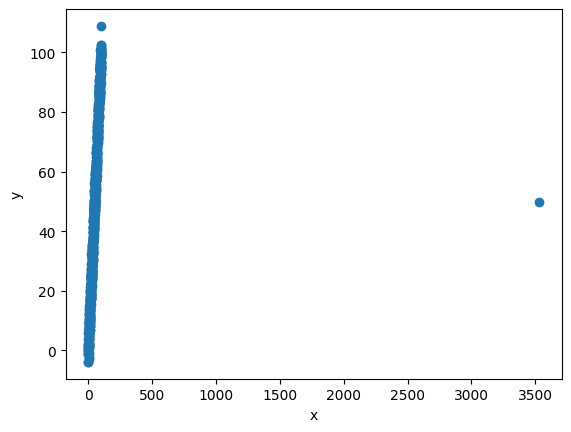

In [30]:
plt.scatter(df['x'],df['y'])
plt.xlabel("x")
plt.ylabel("y")

# Feature Engineering

In [4]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
df.fillna(df.mean(), inplace=True)

In [6]:
df.isnull().sum()

x    0
y    0
dtype: int64

# Comparison after feature engineering

Text(0, 0.5, 'y')

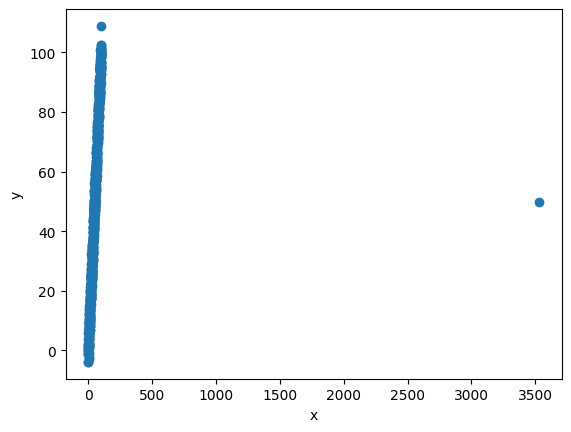

In [31]:
plt.scatter(df['x'],df['y'])
plt.xlabel("x")
plt.ylabel("y")

In [32]:
#correlation
df.corr()

,x,y
x,1.00000,0.21383
y,0.21383,1.00000


In [34]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


# Using seaborn for visual explaination 

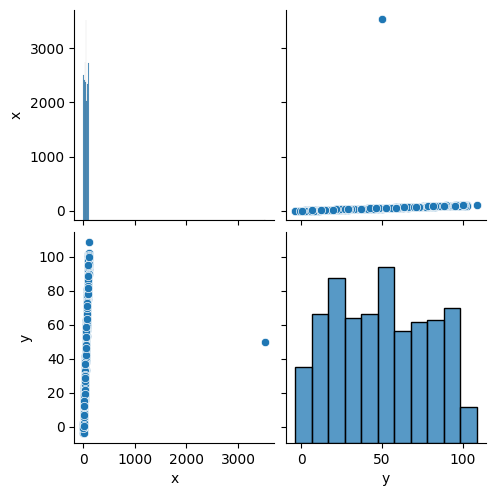

In [94]:
import seaborn as sns
sns.pairplot(df)

# Splitting Data for Traing and Testing

In [95]:
X = df[['x']]  #indepedent feature shd be a df or 2Darray
Y = df['y']   #dependent or target value can be series or 1D

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standerdizing the values

In [107]:
#standerdization
from sklearn.preprocessing import StandardScaler

In [108]:
#just standerdise the input feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [109]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.28677627],
       [ 0.26672519],
       [-0.24791913],
       [ 0.19320457],
       [-0.2679702 ],
       [ 0.28677627],
       [-0.26128651],
       [-0.10756159],
       [ 0.11968396],
       [ 0.23999042],
       [ 0.02611226],
       [-0.34149082],
       [-0.04072466],
       [-0.34817451],
       [-0.36822559],
       [-0.16771482],
       [ 0.15978611],
       [-0.38159298],
       [-0.14766374],
       [ 0.15978611],
       [ 0.27340888],
       [ 0.03279596],
       [ 0.27340888],
       [-0.21450067],
       [-0.34149082],
       [-0.32143974],
       [-0.1877659 ],
       [-0.28802128],
       [ 0.12636765],
       [-0.02735728],
       [ 0.07289811],
       [-0.34817451],
       [ 0.14641873],
       [-0.0073062 ],
       [-0.03404097],
       [-0.1877659 ],
       [-0.2746539 ],
       [-0.22786805],
       [ 0.22662304],
       [-0.20113328],
       [-0.36822559],
       [-0.34817451],
       [ 0.05953073],
       [-0.08751051],
       [-0.06745943],
       [-0

# Train Model

In [110]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [111]:
regression.coef_

array([5.36483335])

In [112]:
regression.intercept_

50.79261517348653

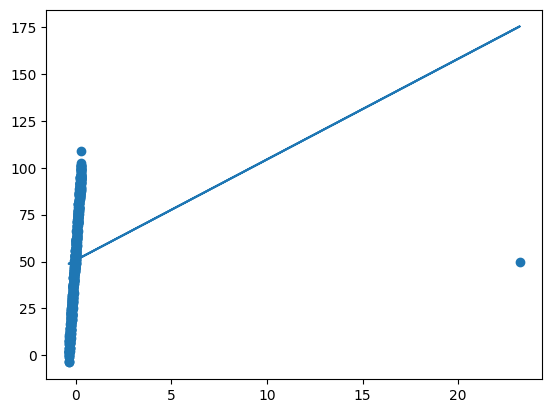

In [116]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train)) ## Best fit line

# Test the model

In [117]:
#prediction for test data
y_pred=regression.predict(X_test)

# Check for model performance

In [120]:
import numpy as np

In [121]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rms = np.sqrt(mse)

print(mse)
print(mae)
print(rms)

893.7284969309908
25.801218159191478
29.895292220197327


In [122]:
r2_score(y_test,y_pred)

0.05380164127602194

# An R² value of 0.0538 suggests that the model explains only a small proportion (about 5.38%) of the variance in the dependent variable.